In [81]:
import pandas as pd
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
import glob
%matplotlib inline

In [82]:
header = ['num_apps', 'f1']
files = glob.glob("../../mainstream/data/cpp/atc/schedules/*")
results = {}
results_lines = []
for filename in files:
    run = filename.split("/")[-1]
    scheduler = run.split("-")[0].split(".")[0]
    budget = run.split("-")[1].split(".")[0]
    num_apps = run.split("-")[-1].split(".")[0]
    scheduler = scheduler + "-" + budget.zfill(3)
    print(run, scheduler, budget, num_apps)
    results[scheduler] = defaultdict(list)
    with open(filename) as f:
        for line in f:
            line = line.split(",")
            assert int(line[1]) == int(num_apps)
            time_taken = float(line[-1]) / 1e6
            results[scheduler][num_apps].append(time_taken)
            results_lines.append((scheduler, num_apps, time_taken))

('stems_cpp.mainstream-100.000000.sim.042518-3.v1', 'stems_cpp-100', '100', '3')
('stems_cpp.mainstream-100.sim.042518-4.v1', 'stems_cpp-100', '100', '4')
('stems_cpp.mainstream-250.000000.sim.042518-2.v1', 'stems_cpp-250', '250', '2')
('stems_cpp.mainstream-50.sim.042518-6.v1', 'stems_cpp-050', '50', '6')
('stems_cpp.mainstream-250.sim.042518-4.v1', 'stems_cpp-250', '250', '4')
('stems_cpp.mainstream-250.000000.sim.042518-3.v1', 'stems_cpp-250', '250', '3')
('stems_cpp.mainstream-50.sim.042518-7.v1', 'stems_cpp-050', '50', '7')
('stems_cpp.mainstream-250.sim.042518-5.v1', 'stems_cpp-250', '250', '5')
('stems_cpp.mainstream-100.000000.sim.042518-2.v1', 'stems_cpp-100', '100', '2')
('stems_cpp.mainstream-100.sim.042518-5.v1', 'stems_cpp-100', '100', '5')
('stems_cpp.mainstream-300.sim.042518-4.v1', 'stems_cpp-300', '300', '4')
('stems_cpp.mainstream-50.sim.042518-8.v1', 'stems_cpp-050', '50', '8')
('stems_cpp.mainstream-150.sim.042518-5.v1', 'stems_cpp-150', '150', '5')
('stems_cpp.main

In [83]:
df = pd.DataFrame(results_lines, columns=['Scheduler', 'No of Apps', 'Time Taken (s)'])
results

{'stems_cpp-050': defaultdict(list,
             {'5': [0.33957,
               0.483183,
               0.442253,
               0.426276,
               0.382211,
               0.327453,
               0.396801,
               0.369735,
               0.462101,
               0.457896,
               0.435159,
               0.36491,
               0.522018,
               0.502907,
               0.595036,
               0.450425,
               0.368309,
               0.391284,
               0.439661,
               0.504218,
               0.373442,
               0.517145,
               0.330152,
               0.312498,
               0.437179,
               0.423005,
               0.330041,
               0.313171,
               0.394788,
               0.356777,
               0.434242,
               0.448754,
               0.332474,
               0.310723,
               0.389231,
               0.333123,
               0.326749,
               0.310105,
           

In [84]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)
df.groupby(['No of Apps', 'Scheduler']).mean()

Time Taken (s)
No of Apps Scheduler                    
2          stems_cpp-050             0.0
           stems_cpp-100             0.0
           stems_cpp-150             0.1
           stems_cpp-200             0.2
           stems_cpp-250             0.2
           stems_cpp-300             0.2
3          stems_cpp-050             0.1
           stems_cpp-100             0.3
           stems_cpp-150             1.2
           stems_cpp-200             2.8
           stems_cpp-250             3.4
           stems_cpp-300             3.4
4          stems_cpp-050             0.3
           stems_cpp-100             1.3
           stems_cpp-150             6.9
           stems_cpp-200            20.4
           stems_cpp-250            26.2
           stems_cpp-300            26.3
5          stems_cpp-050             0.4
           stems_cpp-100             2.4
           stems_cpp-150            19.2
           stems_cpp-200            73.8
           stems_cpp-250           103.9
           stems_cpp-300           107.0
6          stems_cpp-050             0.6
           stems_cpp-100             3.3
           stems_cpp-150            34.3
           stems_cpp-200           147.8
           stems_cpp-250           215.8
           stems_cpp-300           223.2
7          stems_cpp-050             0.7
           stems_cpp-100             4.0
           stems_cpp-150            46.1
           stems_cpp-200           217.9
           stems_cpp-250           335.0
           stems_cpp-300           350.3
8          stems_cpp-050             0.8
           stems_cpp-100             4.8
           stems_cpp-150            59.6
           stems_cpp-200           282.9
           stems_cpp-250           412.5

In [85]:
pt = df.pivot_table(values='Time Taken (s)', index='No of Apps', columns='Scheduler')
pt

Scheduler,stems_cpp-050,stems_cpp-100,stems_cpp-150,stems_cpp-200,stems_cpp-250,stems_cpp-300
No of Apps,,,,,,
2,0.0,0.0,0.1,0.2,0.2,0.2
3,0.1,0.3,1.2,2.8,3.4,3.4
4,0.3,1.3,6.9,20.4,26.2,26.3
5,0.4,2.4,19.2,73.8,103.9,107.0
6,0.6,3.3,34.3,147.8,215.8,223.2
7,0.7,4.0,46.1,217.9,335.0,350.3
8,0.8,4.8,59.6,282.9,412.5,nan


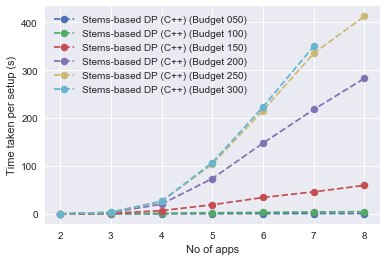

In [86]:
labels = {
    'exhaustive': "Exhaustive (C++)",
    'hifi': "DP on demand [high memory usage] (Python-PyPy)",
    "stems": "Stems-based DP (Python-PyPy)",
    "stems_cpp": "Stems-based DP (C++)",
}
for k, v in pt.iteritems():
    scheduler, budget = k.split("-")
    plt.plot(v.dropna(), '.--', label=labels[scheduler] + " (Budget " + budget + ")", ms=15)
plt.legend()
plt.ylabel('Time taken per setup (s)')
plt.xlabel('No of apps')
plt.xticks(range(2, 9))
plt.savefig("../plots/perf/perf_nice-real.pdf")
plt.savefig("../plots/perf/perf_nice-real.png", dpi=200)
# plt.ylim(0, 100)